In [2]:
from aestheval.data.datasets import PCCD
import torch
SPLITS = ('train', 'val', 'test')

pccd_dataset = [PCCD(split, data_path= "/media/data-storage/datasets/PCCD",load_images=False) for split in SPLITS]

In [3]:
dataset = torch.utils.data.ConcatDataset(pccd_dataset)

In [4]:
len(dataset)

4235

In [11]:
keys = dataset.datasets[0].attributes
keys

['general_impression',
 'subject_of_photo',
 'composition',
 'use_of_camera',
 'depth_of_field',
 'color_lighting',
 'focus']

In [12]:
ncomments=[]
nwords = []
for im, d in dataset:
    # print(d)
    comments = [d[k] for k in keys if d[k]]
    ncomments.append(len(comments))
    nwords.extend([len(x.split()) for x in comments])
import statistics as st
st.mean(ncomments)

6.628099173553719

In [13]:
st.mean(nwords)

41.09718560741005

In [7]:
import statistics as st
from tqdm import tqdm 

def compute_mean(list_of_scores):
    good_scores = []
    for i in list_of_scores:
        try:
            good_scores.append(int(i))
        except:
            continue
    return st.mean(good_scores)

gt_scores, pred_scores = zip(*[(compute_mean(data['score']), data['mean_score']) for _, data in tqdm(dataset)])



100%|██████████| 4235/4235 [00:00<00:00, 131465.85it/s]


In [11]:
from scipy import stats
import sklearn.metrics as sm

srcc = stats.spearmanr(gt_scores, pred_scores)
print("SRCC =", srcc)
mse = round(sm.mean_squared_error(gt_scores, [score*10 for score in pred_scores]), 4)
print("MSE =", mse)
lcc = stats.pearsonr(gt_scores, pred_scores)
print("LCC =", lcc)

SRCC = SpearmanrResult(correlation=0.6066458147931981, pvalue=0.0)
MSE = 1.5729
LCC = (0.6499357318742437, 0.0)


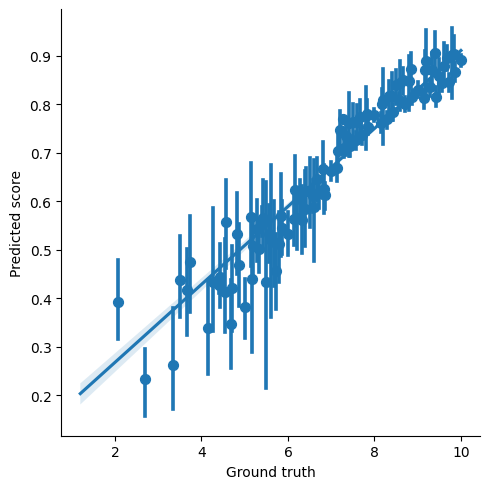

In [10]:
import pandas as pd
df = pd.DataFrame({
    "Ground truth": gt_scores,
    "Predicted score": pred_scores
    })
import seaborn as sns
ax = sns.lmplot(x="Ground truth", y="Predicted score", data=df, x_bins=1000)
